In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,9)

In [3]:
df = pd.read_csv("/Users/michaelford/uni/st-data-mining/stdm-coursework/data/Crimes_-_2001_to_present.csv")
df = df[df['Primary Type'] == "THEFT"].copy()
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
df['TimeOfWeek'] = df['Date'].dt.weekday.astype('timedelta64[D]') + pd.to_timedelta(df['Date'].dt.hour,unit='h')
ex = df[['X Coordinate', 'Y Coordinate', 'TimeOfWeek']]
ex = ex.dropna(axis=0, how='any')
ex['TimeOfWeek'] = ex['TimeOfWeek'].dt.days*24 + ex['TimeOfWeek'].dt.seconds/3600
ex['X Coordinate'] = ex['X Coordinate'] / 500
ex['Y Coordinate'] = ex['Y Coordinate'] / 500

In [174]:
ex.pop('label')
1

1

In [175]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=100)

In [176]:
model.fit(ex)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=100, n_init=3, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)

In [177]:
ex['label'] = model.labels_

In [178]:
sx = ex.sample(1000)

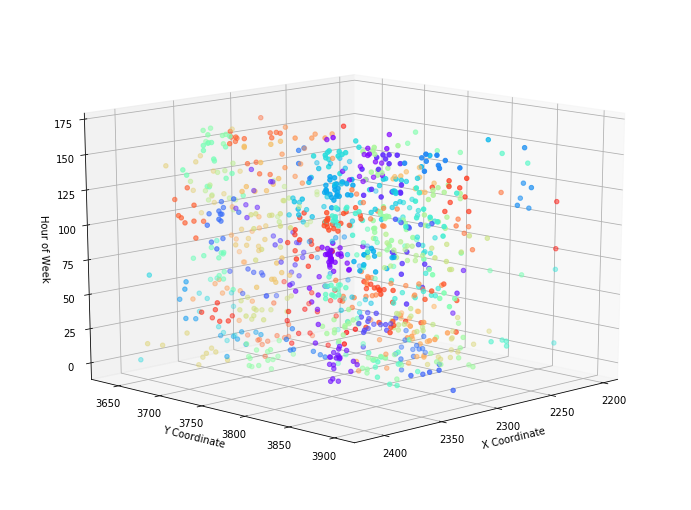

In [179]:
plot_3d = plt.figure().gca(projection='3d')
plot_3d.view_init(15,45)
plot_3d.scatter(sx['X Coordinate'], sx['Y Coordinate'], sx['TimeOfWeek'], c=sx['label'], cmap='rainbow' )
plot_3d.set_xlabel('X Coordinate')
plot_3d.set_ylabel('Y Coordinate ')
plot_3d.set_zlabel('Hour of Week')
plt.show()

In [136]:
ex.label.value_counts().head(30)

75    45931
14    43815
9     33706
48    31622
46    30932
17    29515
28    26841
39    21468
86    20661
99    20493
3     19247
25    18790
2     18500
73    18111
57    17812
93    17805
82    17393
60    17028
78    17020
77    16698
34    16491
19    16254
26    15716
5     15613
79    15532
91    15455
64    15251
27    14935
32    14705
6     14401
Name: label, dtype: int64

In [141]:
model.cluster_centers_[75]

array([2351.1667669 , 3803.57230575,  115.66395512,   46.2171108 ])

In [142]:
ex.head()

,X Coordinate,Y Coordinate,TimeOfWeek,label
3,2308.200,3814.828,40.0,56
4,2369.244,3703.726,46.0,26
32,2326.832,3820.144,48.0,39
40,2337.590,3860.576,107.0,64
41,2359.812,3700.878,40.0,26
